In [9]:
# Manipulação e Análise dos dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e Machine Learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Avaliação de Metricas e Visualização de Outliers
from sklearn.metrics import classification_report, r2_score, root_mean_squared_error, f1_score
import plotly.express as px

### Perguntas que queremos responder

- Como os dados estão distribuídos?
- Existem valores fora do padrão já visíveis?
- Quais vairáveis podem ajudar o modelo a detectar anomalias?

#### Pensamento Analítico Comum
- Antes de detectar o anomalias, preciso entender o que é normal

" Avaliar estatísticas básicas ajuda a definir o que é "normal" "

" Outliers muitas vezes podem ser percebidos só olhando a dispersão dos dados "

" Categorias como 'Outros' ou valores muitos altos podem esconder padrões de fraude ou exceções " 

---
#### Ações que vamos fazer:
1. Carregar o dataset

2. Ver primeiras linhas e tipos de dados

3. Feature Engineering & Data Cleaning

4. Análise estatística das variáveis numéricas (valor)

5. Distribuição de reembolsos por categoria

6. Distribuição de reembolsos por funcionário

7. Análise visual com gráficos

---
#### Resultado esperado:
- Identificar padrões esperados (ex: reembolso alimentação = valores menores)

- Levantar hipóteses: “Por que esse funcionário tem mais reembolsos?”, “Essa categoria costuma ter valores muito acima?”

- Pensar em features úteis para o modelo: valor, categoria, frequência, etc.



### Carregar Dados

- Como os dados estão estruturados?

- Vamos observar as primeira linhas para entender o formato do dataset, valores possíveis e o que pode ser ruído

In [10]:
# Carregar DataSet
df_reembolso = pd.read_csv('.\datasets\dados_reembolsos.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Carolina\AppData\Local\Temp\ipykernel_8436\2106397421.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_reembolso = pd.read_csv('.\datasets\dados_reembolsos.csv')


In [11]:
df_reembolso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_funcionario  1000 non-null   int64  
 1   data_reembolso  1000 non-null   object 
 2   categoria       1000 non-null   object 
 3   valor           1000 non-null   float64
 4   descricao       1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


- Os dados estão completos, não é necessário converter os tipos das variáveis, remover ou imputar dados ou padronizar categorias

- Temos 2 variáveis numéricas e 3 variáveis categóricas

- O Dataset é composto por __5 Colunas e 1000 Linhas__

In [12]:
# Observar estrutura e Valores
df_reembolso.head(10)

,id_funcionario,data_reembolso,categoria,valor,descricao
0,1061,2024-12-20,Transporte,23.69,Reembolso de combustível
1,1088,2024-11-12,Educação,213.96,Inscrição em conferência da área
2,1027,2024-11-14,Outros,137.96,Compra emergencial durante viagem
3,1067,2024-10-31,Transporte,175.51,Reembolso de combustível
4,1097,2024-12-30,Educação,355.66,Treinamento obrigatório da empresa
5,1098,2025-01-31,Alimentação,39.94,Almoço com cliente em restaurante local
6,1088,2024-10-17,Educação,348.60,Inscrição em conferência da área
7,1024,2024-10-14,Transporte,38.11,Estacionamento em local de reunião
8,1098,2024-12-28,Outros,362.40,Compra de material de escritório
9,1091,2025-02-18,Hotel,505.78,Reembolso de hospedagem em congresso


### Feature Engineering

In [13]:
# Mostrar e remover (se houver) colunas categoricas que possuem somente um valor possível
for column in df_reembolso.select_dtypes(include=['object']).columns:
    if df_reembolso[column].nunique() == 1:
        print(f'{column} tem soment um valor posssivel: {df_reembolso[column].unique()}')


In [14]:
# Mostrar os valores possíveis das colunas catagóricas
for column in df_reembolso.select_dtypes(include=['object']).columns:
    print(f'{column} Possui o valores de {df_reembolso[column].unique()}')

data_reembolso Possui o valores de ['2024-12-20' '2024-11-12' '2024-11-14' '2024-10-31' '2024-12-30'
 '2025-01-31' '2024-10-17' '2024-10-14' '2024-12-28' '2025-02-18'
 '2025-02-07' '2025-01-08' '2024-11-27' '2025-03-08' '2025-03-20'
 '2025-02-11' '2024-12-05' '2024-12-18' '2024-11-09' '2025-03-30'
 '2025-03-21' '2024-11-05' '2024-11-29' '2024-11-23' '2025-04-14'
 '2025-04-05' '2025-02-06' '2024-11-07' '2024-12-01' '2025-04-13'
 '2025-03-27' '2024-11-21' '2024-10-15' '2025-04-10' '2025-01-30'
 '2025-04-06' '2025-03-01' '2024-12-07' '2024-12-03' '2025-03-29'
 '2025-03-16' '2025-01-01' '2025-02-16' '2025-01-25' '2025-03-05'
 '2024-10-16' '2025-02-27' '2025-02-12' '2025-02-23' '2024-12-02'
 '2025-01-24' '2025-02-28' '2025-03-07' '2025-04-01' '2024-12-12'
 '2025-04-12' '2025-02-09' '2025-04-09' '2025-04-11' '2024-12-25'
 '2025-02-04' '2024-11-06' '2025-01-20' '2025-02-05' '2025-02-25'
 '2024-12-31' '2025-02-02' '2024-11-08' '2024-10-21' '2025-02-22'
 '2025-04-02' '2025-02-14' '2025-01-22' '

#### Estatística Descritiva

In [15]:
df_reembolso.describe()

,id_funcionario,valor
count,1000.000000,1000.000000
mean,1053.399000,253.495100
std,28.770498,217.906168
min,1000.000000,10.000000
25%,1028.000000,84.275000
50%,1049.000000,175.000000
75%,1081.000000,373.320000
max,1098.000000,1102.310000


- Ao observar a Estatística descritivas, notamos que o desvio padrão da variável "valor" está bem alto, um valor bem próximo a média dessa variável. Isso indica que provavelmente temos alguns Outliers para identificar 

---
- Como esta a distribuição das categorias?

In [16]:
# Distribuição por categoria
fig = px.histogram(df_reembolso['categoria'], title='Quantidade de Reembolso por Categoria')

fig.show()

- Nota-se uma base de dados relativamaente equilibrada, não temos a necessidade de agrupar ou considerar alguma categoria como rara
- A distribuição esta saudável, podemos aplicar OneHotEncondes sem gerar sparsidade excessiva.

In [17]:
# Distribuição dos valores por categoria
fig = px.histogram(df_reembolso, x='categoria', y='valor', title='Distribuição de Valores por Categoria')

fig.show()

- Vemos que em algumas categorias o valor do reembolso é bem alto.

- Onde estão os Outliers?

In [18]:
# BoxPlot dos valores por categoria
fig = px.box(df_reembolso, x='categoria', y='valor', color=df_reembolso['categoria'], title='BoxPlot dos Valores por Categoria')

fig.show()

- Dentro do BoxPlot podemos observar que valores altos são bem distribuidos dentro de algumas categorias, também podemos notar que existem alguns outliers nas categorias Outros, Transporte e Educação. Vamos examinar melhor estas variáveis para entender se tem qualquer tipo de erro que justifique.

---
- Quem mais solicita reembolso?

- Vamos observar a quantidade de reembolso por funcionário

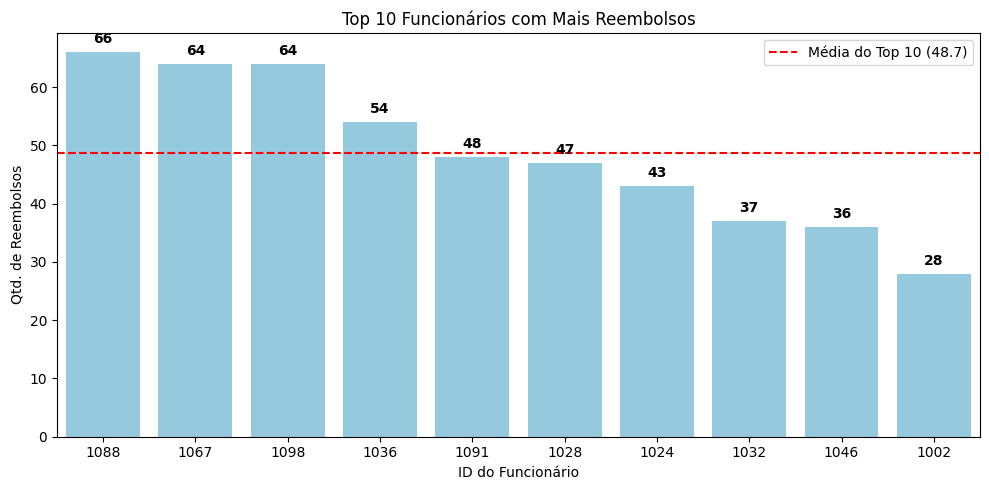

In [19]:
# Preparar dados
top_funcionarios = df_reembolso['id_funcionario'].value_counts().head(10)
ids = top_funcionarios.index.astype(str)
valores = top_funcionarios.values

# Calcular média
media_reembolsos = top_funcionarios.mean()

# Criar o gráfico
plt.figure(figsize=(10, 5))
bars = sns.barplot(x=ids, y=valores, color='skyblue')

# Adicionar valores no topo das barras
for i, v in enumerate(valores):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Linha de referência e legenda
plt.axhline(media_reembolsos, color='red', linestyle='--', label=f'Média do Top 10 ({media_reembolsos:.1f})')
plt.legend(loc='upper right')

# Títulos e eixos
plt.title("Top 10 Funcionários com Mais Reembolsos")
plt.xlabel("ID do Funcionário")
plt.ylabel("Qtd. de Reembolsos")
plt.tight_layout()
plt.show()


- Agora podemos ver a média de reembolsos dos 10 mais ativos. Facilitando reconhecer que esta muito acima dos valores reais.

#### Data Cleaning
- Vamos retirar as colunas que não funcionam para o modelo de Isolation Forest ('descrição' e 'data')

#### Pensamento analítico
Próximas etapas: 
- OneHot para transformar as cateorias em números (IsolationForest não entende texto ou datas)

- StandardScale para normalizar as escalas numéricas

### Preparando os Dados

In [20]:
# Selecionar colunas úteis para o modelo
df_reembolso_modelo = df_reembolso[['categoria', 'valor', 'id_funcionario']]

In [21]:
df_reembolso_modelo.head(10)

,categoria,valor,id_funcionario
0,Transporte,23.69,1061
1,Educação,213.96,1088
2,Outros,137.96,1027
3,Transporte,175.51,1067
4,Educação,355.66,1097
5,Alimentação,39.94,1098
6,Educação,348.60,1088
7,Transporte,38.11,1024
8,Outros,362.40,1098
9,Hotel,505.78,1091


In [22]:
# Saparando colunas numéricas e categóricas
numeric_feature = df_reembolso_modelo.select_dtypes(include='number').columns
categorical_feature = df_reembolso_modelo.select_dtypes(include='object').columns

In [23]:
# Criando Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_feature),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feature)
])

In [24]:
# Criar Pipeline com Isolation Forest
pipeline = Pipeline([
    ('preprocessador', preprocessor),
    ('modelo', IsolationForest(contamination=0.03, random_state=51))
    # Esperamos apensa 3% de outliers
])

In [25]:
# Treinar o modelo
pipeline.fit(df_reembolso_modelo)

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['valor', 'id_funcionario'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['categoria'], dtype='object'))])),
                ('modelo',
                 IsolationForest(contamination=0.03, random_state=51))])

In [26]:
# Dados transformados
dados_transformados = pipeline.named_steps['preprocessador'].transform(df_reembolso_modelo)
# Fazer previsões
predicoes = pipeline.named_steps['modelo'].predict(dados_transformados)
scores = pipeline.named_steps['modelo'].decision_function(dados_transformados)

In [27]:
# Criando novas colunas no DataFrame
df_reembolso['outliers'] = predicoes
df_reembolso['score_anomalia'] = scores
df_reembolso['alerta'] = df_reembolso['outliers'].apply(lambda x: 'Suspeito' if x == -1 else 'Normal')

### Vizualizar dados de anomalias

In [28]:
df_reembolso.head(10)

,id_funcionario,data_reembolso,categoria,valor,descricao,outliers,score_anomalia,alerta
0,1061,2024-12-20,Transporte,23.69,Reembolso de combustível,1,0.053529,Normal
1,1088,2024-11-12,Educação,213.96,Inscrição em conferência da área,1,0.065638,Normal
2,1027,2024-11-14,Outros,137.96,Compra emergencial durante viagem,1,0.082201,Normal
3,1067,2024-10-31,Transporte,175.51,Reembolso de combustível,1,0.053236,Normal
4,1097,2024-12-30,Educação,355.66,Treinamento obrigatório da empresa,1,0.052962,Normal
5,1098,2025-01-31,Alimentação,39.94,Almoço com cliente em restaurante local,1,0.047520,Normal
6,1088,2024-10-17,Educação,348.60,Inscrição em conferência da área,1,0.099327,Normal
7,1024,2024-10-14,Transporte,38.11,Estacionamento em local de reunião,1,0.100334,Normal
8,1098,2024-12-28,Outros,362.40,Compra de material de escritório,1,0.039908,Normal
9,1091,2025-02-18,Hotel,505.78,Reembolso de hospedagem em congresso,1,0.092781,Normal


In [29]:
# Criando Grafico de Disperção para analisar os resultados
fig = px.scatter(
    df_reembolso,
    x='categoria',
    y='valor',
    color='alerta',
    hover_data=['descricao', 'score_anomalia'],
    title='Distribuição dos Reembolsos por Categoria e Alerta de Anomalia'
)

fig.update_layout(xaxis_title='Categoria', yaxis_title='Valor do Reembolso')
fig.show()

In [30]:
# Ranking de funcionario por reembolso
ranking_alertas = df_reembolso[df_reembolso['alerta'] == 'Suspeito']['id_funcionario'].value_counts().reset_index()
# Nomeando as colunas do novo dataset
ranking_alertas.columns = ['id_funcionario', 'qtd_alertas']
# Apenas os 10 mais relevantes
ranking_top10 = ranking_alertas.head(10)

<Axes: xlabel='id_funcionario', ylabel='qtd_alertas'>

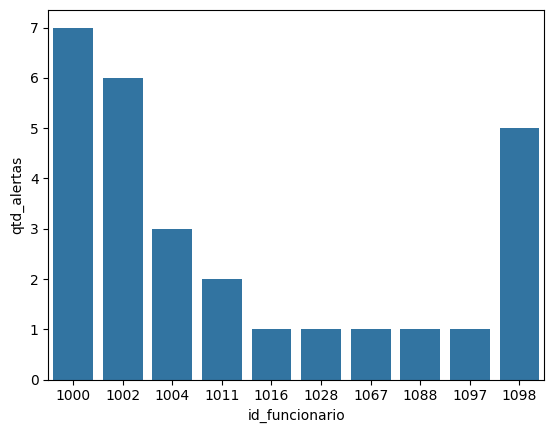

In [32]:
sns.barplot(ranking_top10, x='id_funcionario', y='qtd_alertas')



### Usando o Git para versionamento
- essa é uma nova modificação
